In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

In [2]:
import pandas as pd

In [5]:
import os

In [11]:
textList = []

Я не стал загружать эти датасеты на гит.

Я пользовался той разметкой, которая была заложена создателями датасета: train/test, neg/pos. Папка unsup мной не использовалась (надеюсь, она была не нужна).

In [12]:
posL = os.listdir('./aclImdb/train/pos')
negL = os.listdir('./aclImdb/train/neg')
posC = len(posL)
negC = len(negL)


for txt in posL:
    with open('.\\aclImdb\\train\\pos\\' + txt, 'r', encoding='utf-8') as f:
        textList.append([f.read(), 1])
    if len(textList) % 100 == 0:
        print('%d out of %d: %f' % (len(textList), posC, len(textList) / posC))
        
thr = len(textList)
        
for txt in negL:
    with open('.\\aclImdb\\train\\neg\\' + txt, 'r', encoding='utf-8') as f:
        textList.append([f.read(), 0])
    ltl = len(textList) - thr
    if ltl % 100 == 0:
        print('%d out of %d: %f' % (ltl, negC, ltl / negC))

100 out of 12500: 0.008000
200 out of 12500: 0.016000
300 out of 12500: 0.024000
400 out of 12500: 0.032000
500 out of 12500: 0.040000
600 out of 12500: 0.048000
700 out of 12500: 0.056000
800 out of 12500: 0.064000
900 out of 12500: 0.072000
1000 out of 12500: 0.080000
1100 out of 12500: 0.088000
1200 out of 12500: 0.096000
1300 out of 12500: 0.104000
1400 out of 12500: 0.112000
1500 out of 12500: 0.120000
1600 out of 12500: 0.128000
1700 out of 12500: 0.136000
1800 out of 12500: 0.144000
1900 out of 12500: 0.152000
2000 out of 12500: 0.160000
2100 out of 12500: 0.168000
2200 out of 12500: 0.176000
2300 out of 12500: 0.184000
2400 out of 12500: 0.192000
2500 out of 12500: 0.200000
2600 out of 12500: 0.208000
2700 out of 12500: 0.216000
2800 out of 12500: 0.224000
2900 out of 12500: 0.232000
3000 out of 12500: 0.240000
3100 out of 12500: 0.248000
3200 out of 12500: 0.256000
3300 out of 12500: 0.264000
3400 out of 12500: 0.272000
3500 out of 12500: 0.280000
3600 out of 12500: 0.288000
3

In [13]:
df = pd.DataFrame(data=textList, columns=['text', 'target']).sample(frac=1)
df

,text,target
6664,I really enjoyed this movie and it was a littl...,1
13560,This is the story of two guys who found a copy...,0
10319,Two snipers travel deep in the jungles in sear...,1
1445,Ossessione<br /><br />Luchino Visconti's debut...,1
15875,Although I have enjoyed Bing Crosby in other m...,0
...,...,...
12338,(spoilers??)<br /><br />I wasn't sure what to ...,1
10154,Freddy's Dead: The Final Nightmare (1991) was ...,1
14946,The summary pretty much sums it all up. This i...,0
10702,"Robot Jox tries hard, but is fundamentally a s...",1


In [15]:
count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(df['text'].tolist())
clf = LogisticRegression().fit(X_train_counts, df['target'].tolist())

C:\users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [16]:
testList = []

posL = os.listdir('./aclImdb/test/pos')
negL = os.listdir('./aclImdb/test/neg')
posC = len(posL)
negC = len(negL)


for txt in posL:
    with open('.\\aclImdb\\test\\pos\\' + txt, 'r', encoding='utf-8') as f:
        testList.append([f.read(), 1])
    if len(testList) % 100 == 0:
        print('%d out of %d: %f' % (len(testList), posC, len(testList) / posC))
        
thr = len(textList)
        
for txt in negL:
    with open('.\\aclImdb\\test\\neg\\' + txt, 'r', encoding='utf-8') as f:
        testList.append([f.read(), 0])
    ltl = len(testList) - thr
    if ltl % 100 == 0:
        print('%d out of %d: %f' % (ltl, negC, ltl / negC))
        
df_test = pd.DataFrame(data=testList, columns=['text', 'target']).sample(frac=1)

100 out of 12500: 0.008000
200 out of 12500: 0.016000
300 out of 12500: 0.024000
400 out of 12500: 0.032000
500 out of 12500: 0.040000
600 out of 12500: 0.048000
700 out of 12500: 0.056000
800 out of 12500: 0.064000
900 out of 12500: 0.072000
1000 out of 12500: 0.080000
1100 out of 12500: 0.088000
1200 out of 12500: 0.096000
1300 out of 12500: 0.104000
1400 out of 12500: 0.112000
1500 out of 12500: 0.120000
1600 out of 12500: 0.128000
1700 out of 12500: 0.136000
1800 out of 12500: 0.144000
1900 out of 12500: 0.152000
2000 out of 12500: 0.160000
2100 out of 12500: 0.168000
2200 out of 12500: 0.176000
2300 out of 12500: 0.184000
2400 out of 12500: 0.192000
2500 out of 12500: 0.200000
2600 out of 12500: 0.208000
2700 out of 12500: 0.216000
2800 out of 12500: 0.224000
2900 out of 12500: 0.232000
3000 out of 12500: 0.240000
3100 out of 12500: 0.248000
3200 out of 12500: 0.256000
3300 out of 12500: 0.264000
3400 out of 12500: 0.272000
3500 out of 12500: 0.280000
3600 out of 12500: 0.288000
3

In [17]:
df_test

,text,target
4711,"With all the dreck out there, this is a gentle...",1
17045,(Some Spoilers) Dull as dishwater slasher flic...,0
11040,"For the most part, I only enjoy the kind of mo...",1
4631,As a dedicated lover of all things Egyptian th...,1
21670,"It's hard to believe a movie can be this bad, ...",0
...,...,...
21822,"In Pasadena, Mrs. Davis (Joanna Cassidy) sends...",0
23574,While the David Lynch version of Dune is chopp...,0
149,Not much to it but a validation of small town ...,1
4143,"This is a very enjoyable, fluffy, glamorous mu...",1


In [18]:
X_test = count_vect.transform(df_test['text'].tolist())


In [32]:
predicted = clf.predict(X_test)

In [33]:
predicted.shape

(25000,)

In [20]:
import sklearn.metrics as skl

In [21]:
test_target = df_test['target'].tolist()

acc = skl.accuracy_score(test_target, predicted)
micro_f1 = skl.f1_score(test_target, predicted, average = 'micro')
micro_p = skl.precision_score(test_target, predicted, average = 'micro')
micro_r = skl.recall_score(test_target, predicted, average = 'micro')
macro_f1 = skl.f1_score(test_target, predicted, average = 'macro')
macro_p = skl.precision_score(test_target, predicted, average = 'macro')
macro_r = skl.recall_score(test_target, predicted, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.8635
micro F1=0.8635, micro P=0.8635, micro R=0.8635
macro F1=0.8635, macro P=0.8636, macro R=0.8635



In [22]:
from matplotlib import pyplot


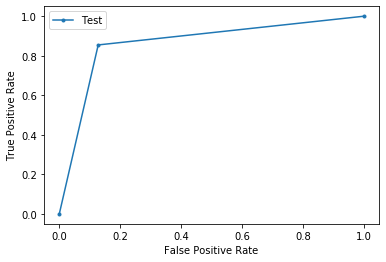

In [23]:
fpr, tpr, thrhld = skl.roc_curve(test_target, predicted)
pyplot.plot(fpr, tpr, marker='.', label='Test')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


In [24]:
print(skl.roc_auc_score(test_target, predicted))


0.8635200000000001


### Часть 2

In [34]:
probs = clf.predict_proba(X_test)

In [36]:
df_test['prob'] = probs[:,1]

In [37]:
df_test

,text,target,prob
4711,"With all the dreck out there, this is a gentle...",1,0.990889
17045,(Some Spoilers) Dull as dishwater slasher flic...,0,0.000427
11040,"For the most part, I only enjoy the kind of mo...",1,0.999782
4631,As a dedicated lover of all things Egyptian th...,1,0.992380
21670,"It's hard to believe a movie can be this bad, ...",0,0.298092
...,...,...,...
21822,"In Pasadena, Mrs. Davis (Joanna Cassidy) sends...",0,0.601248
23574,While the David Lynch version of Dune is chopp...,0,0.109880
149,Not much to it but a validation of small town ...,1,0.998642
4143,"This is a very enjoyable, fluffy, glamorous mu...",1,0.999933


In [42]:
neg15 = df_test.sort_values(by='prob')['text'][:15].tolist()
pos15 = df_test.sort_values(by='prob', ascending=False)['text'][:15].tolist()

In [45]:
for t in neg15:
    print(t)
    print('\n\n')

Rose  Does anything actually happen in this episode? It introduces our two leads, a slow-witted grinning idiot of a Doctor and an utterly un-interesting companion. There's no plot to speak of, childish humour, mixed with some extremely bad pacing and incidental music. What else is there to say, really?<br /><br />The End of the World  A marginal improvement, in that we see our first outer-space scenario. Subsequently brought down by poor contemporary humour, paper-thin logic, very poor pacing, and tired SF clichés.<br /><br />The Unquiet Dead  Best episode to date showing what can happen when someone knows how to structure an episode, write interesting character dialogue, AND integrate an intriguing plot. Let down solely by the Doctor and Rose.<br /><br />Aliens of London/World War Three - Doctor who degenerates into farce. What more can be said. Penelope Wilton brings the proceedings a little gravity, trying her best in dire circumstances. Some poorly written, and out-of-place soap

In [46]:
for t in pos15:
    print(t)
    print('\n\n')

Life is comprised of infinite possibilities; some known, others a mystery and destined to remain so. And what of the vast unknown, the realms beyond which knowledge has no established boundaries or parameters? Who is to say what exists or what is possible? Valid questions, all of which are raised and explored in the story of a particular individual's personal journey, a strange and dramatic odyssey that defies facts and logic, in `K-PAX,' directed by Iain Softley, and starring Kevin Spacey and Jeff Bridges. In the wake of an incident in New York's Central Station, a man named Prot (Spacey) is transported to a psychiatric hospital in Manhattan, where he is delivered into the care of Dr. Mark Powell (Bridges), who attempts to uncover the truth about his patient, who claims to be from the distant planet K-PAX. It quickly becomes a challenge for Dr. Powell, as Prot, with his calm, direct, forthcoming manner and a propensity for produce (he eats bananas peels and all, and Red Delicious Appl

### Часть 3

In [62]:
class MyOwnMetrics:
    
    def __init__(self, y_pred, y_true):
        
        self.classes = sorted(list(set(y_true)))
        compDict = {}
        for c in self.classes:
            compDict[c] = {
                    'tp': 0,
                    'tn': 0,
                    'fp': 0,
                    'fn': 0
                }
        for i in range(len(y_pred)):
            if y_pred[i] == y_true[i]:
                compDict[y_pred[i]]['tp'] += 1
            else:
                compDict[y_pred[i]]['fp'] += 1
                compDict[y_true[i]]['fn'] += 1
        for c in compDict:
            compDict[c]['tn'] = len(y_true) - compDict[c]['tp'] - compDict[c]['fn'] - compDict[c]['fp']
        self.params = compDict
        self._TP = sum([self.params[c]['tp'] for c in self.params])
        self._FP = sum([self.params[c]['fp'] for c in self.params])
        self._TN = sum([self.params[c]['tn'] for c in self.params])
        self._FN = sum([self.params[c]['fn'] for c in self.params])
    
    def accuracy(self):
        return (self._TP + self._TN) / (sum([self._TP, self._TN, self._FN, self._FP]))
    
    def _rec_pre(self, tp, false_x):
        return tp / (tp + false_x)
    
    def micro_recall(self):
        return self._rec_pre(self._TP, self._FN)
    
    def micro_precision(self):
        return self._rec_pre(self._TP, self._FP)
    
    def _macro_RP(self, k):
        recalls = []
        for c in self.params:
            tp = self.params[c]['tp']
            fx = self.params[c][k]
            recalls.append(self._rec_pre(tp, fx))
        return sum(recalls) / len(self.params)
    
    def macro_recall(self):
        return self._macro_RP('fn')
    
    def macro_precision(self):
        return self._macro_RP('fp')
    
    def micro_f1(self):
        mp = self.micro_precision()
        mr = self.micro_recall()
        return 2*mp*mr / (mp + mr)
    
    def macro_f1(self):
        f_scores = []
        
        for c in self.params:
            
            tp = self.params[c]['tp']
            fn = self.params[c]['fn']
            fp = self.params[c]['fp']
        
            r = self._rec_pre(tp, fn)
            p = self._rec_pre(tp, fp)
            
            f_scores.append(2 * p * r / (p + r))        
        
        return sum(f_scores) / len(self.params)

In [63]:
metr = MyOwnMetrics(predicted, test_target)

_acc = metr.accuracy()
_micro_f1 = metr.micro_f1()
_micro_p = metr.micro_precision()
_micro_r = metr.micro_recall()
_macro_f1 = metr.macro_f1()
_macro_p = metr.macro_precision()
_macro_r = metr.macro_recall()

print('SKLEARN:')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

print('My own funcs:')
print('acc={0:1.4f}'.format(_acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(_micro_f1, _micro_p, _micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(_macro_f1, _macro_p, _macro_r))


SKLEARN:
acc=0.8635
micro F1=0.8635, micro P=0.8635, micro R=0.8635
macro F1=0.8635, macro P=0.8636, macro R=0.8635

My own funcs:
acc=0.8635
micro F1=0.8635, micro P=0.8635, micro R=0.8635
macro F1=0.8635, macro P=0.8636, macro R=0.8635

